In [1]:
import random
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
functs = [] #List to keep track of all the runs

for k in range(0, 500): #Iterating the whole simulation k number of times
    print(k+1)


    board = [] # to keep track of the whole board
    numP = 100 # initial number of particles for each type
    board_size = 1000 # number of spaces on the board
    location = [] # keep track of location for each particle on the board

    for i in range(0, board_size): #Adding zeros to represent spots with no particle 
        board.append(0)


    for i in range(0, numP): #populating board with 1-s to represent particle type A
        x = random.randint(0, board_size - 1)
        while board[x] != 0:
            x = random.randint(0, board_size - 1)
        board[x] = 1
        location.append(x)


    for i in range(0, numP): #populating board with 2-s to represent particle type B
        x = random.randint(0, board_size - 1)
        while board[x] != 0:
            x = random.randint(0, board_size - 1)
        board[x] = 2
        location.append(x)


    funct = [] #To keep track of the number of particles at the end of each time step



    for i in range(0, 10000): #Repeating the process up to i number of time steps 

        numParticles = len(location)

        funct.append(numParticles / board_size) #Keeping track of particle density for each time step

        
        for j in range(0, numParticles): #One time-step
                        
            if len(location) != 0:
                x = random.randint(0, len(location) - 1)

                p = location[x]

                sign = 1

                if random.random() < 0.5:
                    sign = -1

                if (p == 0 and sign == -1) or (p == board_size - 1 and sign == 1):
                    sign = -1*sign

                if board[p + sign] == 0:
                    board[p + sign] = board[p]
                    board[p] = 0
                    del location[x]
                    location.append(p + sign)

                else:
                    if board[p] == board[p + sign]:
                        board[p] = 0
                        board[p + sign] = 0
                        del location[x]
                        del location[location.index(p + sign)]
                    else:
                        temp = board[p]
                        board[p] = board[p + sign]
                        board[p + sign] = temp
            
    functs.append(funct)    




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
time = []


for i in range(0, len(funct)):
    time.append(i)


In [4]:
#To keep track of the average density for each time step
average = []
totalStd = []

for i in range(0, len(functs[0])):
    
    sum = 0
    temp = []
               
    for j in range(0, len(functs)):
        sum = sum + functs[j][i]
        temp.append(functs[j][i])
    average.append(sum / len(functs))
    totalStd.append(1*(statistics.stdev(temp)/math.sqrt(len(functs))))

#print(totalStd)

Text(0, 0.5, 'Particle Density')

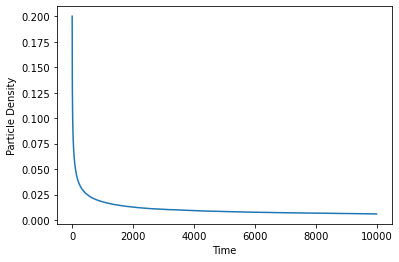

In [5]:
plt.plot(time, average)
plt.xlabel('Time')
plt.ylabel('Particle Density')


<ErrorbarContainer object of 3 artists>

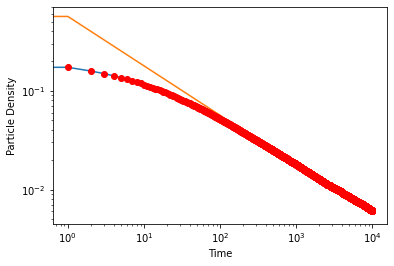

In [6]:
#Plotting expected and simulation particle density
y = []
y.append(2/math.sqrt(4*math.pi*1))

for i in range(1, len(time)):
    y.append(2/math.sqrt(4*math.pi*i))

    
plt.xscale("log")
plt.yscale("log")

plt.plot(time, average)
plt.plot(time, y)
plt.xlabel('Time')
plt.ylabel('Particle Density')
plt.errorbar(time, average, yerr = totalStd, fmt = 'o', color = 'r')



C value is  2.1081263603180598


Text(0, 0.5, 'C')

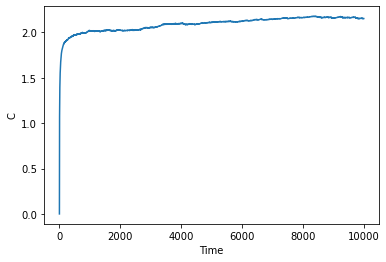

In [7]:
#This is to find the average constant (C) value 
coef = []
ave_temp = 0

for i in range(0, len(average)):
    coef.append(average[i] * (math.sqrt(4*math.pi*time[i])))
    if i >= 1000:
        ave_temp = coef[i] + ave_temp

ave_temp = ave_temp / (8999) #wWHAT IS THIS 8999 NUMBER?

print("C value is ", ave_temp)
    
plt.plot(time, coef)
plt.xlabel('Time')
plt.ylabel('C')
